### 분류종류

- 이진 분류(Binary Classification)
    - 두 그룹으로 분류
    - 참(True) 또는 거짓(False), A 그룹 또는 B 그룹
    - 분류 결과가 맞다면 1(True, A 그룹에 포함)을 반환하며, 아니라면 0(False)을 반환
- 다중 분류(Multiclass Classification)
    - 분류해야하는 그룹이 3종류 이상

분류 성능지표 개념
- https://hwi-doc.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0-%EC%A0%95%ED%99%95%EB%8F%84%EB%A7%8C-%EB%86%92%EC%9C%BC%EB%A9%B4-%EC%A2%8B%EC%9D%80-%EB%AA%A8%EB%8D%B8

### 피마 인디언 당뇨병 예측

- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\python study\특강\diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# 데이터 편향
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
feature = diabetes.iloc[:, :-1]
target = diabetes['Outcome']

In [5]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature,target, random_state=156)

dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

accuracy_score(y_test, pred)

0.6875

In [8]:
X_train, X_test, y_train, y_test = train_test_split(feature,target, shuffle = True, stratify = target, random_state=156)

dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

accuracy_score(y_test, pred)

0.6875

In [9]:
# confusion matrix 만들기
mycon = pd.DataFrame()
mycon['actual'] = y_test
mycon['pred'] = pred
mycon

,actual,pred
84,1,1
604,1,1
739,1,1
762,0,0
411,0,1
...,...,...
111,1,0
527,0,0
682,0,0
613,0,0


(0,0) : TN, (0,1) : FP

(1,0) : FN, (1,1) : TP

In [10]:
mycon['con'] = np.where(mycon['actual']==1, np.where(mycon['pred']==1, 'TP', 'FN'), np.where(mycon['pred']==0, 'TN', 'FP'))
mycon.groupby(['con']).count()

,actual,pred
con,,
FN,35,35
FP,25,25
TN,100,100
TP,32,32


In [11]:
# confusion matrix
confusion_matrix(y_test, pred)

array([[100,  25],
       [ 35,  32]], dtype=int64)

In [12]:
def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy : .4f}, 정밀도 : {precision : .4f}, 재현율 : {recall : .4f}, F1 : {f1 : 4f}, AUC : {roc_auc : .4f}')

In [13]:
get_clf_eval(y_test, pred)

오차행렬
[[100  25]
 [ 35  32]]
정확도 :  0.6875, 정밀도 :  0.5614, 재현율 :  0.4776, F1 :  0.516129, AUC :  0.6388


In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       125
           1       0.56      0.48      0.52        67

    accuracy                           0.69       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.68      0.69      0.68       192



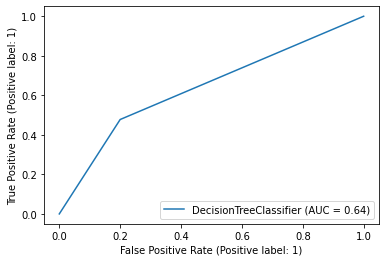

In [15]:
from sklearn.metrics import plot_roc_curve

# roc 그래프
plot_roc_curve(dt, X_test, y_test)
plt.show()

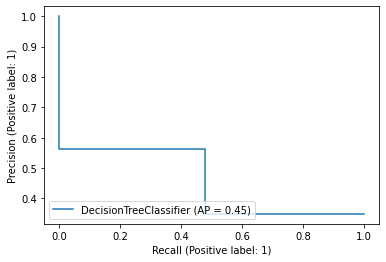

In [16]:
# precision_recall_curve
plot_precision_recall_curve(dt, X_test, y_test)
plt.show()

In [22]:
dt.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [26]:
# predict_proba : 레이블 값이 될 확률 추출
pred_probal = dt.predict_proba(X_test) 
pred_probal[:, 1]

array([1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1.])

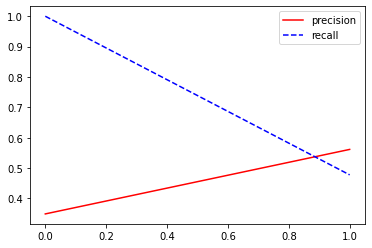

In [27]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_probal[:, 1])
plt.plot(thresholds, precision[:thresholds.shape[0]], 'r-', label = 'precision')
plt.plot(thresholds, recall[:thresholds.shape[0]], 'b--', label = 'recall')
plt.legend()
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(feature,target, random_state=156)

# 로지스틱 회귀로 학습, 예측, 평가 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

accuracy_score(y_test, pred)

0.7447916666666666

In [29]:
X_train, X_test, y_train, y_test = train_test_split(feature, target ,shuffle=True, stratify = target, random_state=156)

# 로지스틱 회귀로 학습, 예측, 평가 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

accuracy_score(y_test, pred)

0.78125

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       125
           1       0.76      0.55      0.64        67

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.78      0.78      0.77       192



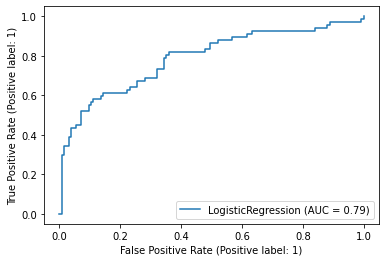

In [31]:
# roc 그래프
plot_roc_curve(lr_clf, X_test, y_test)
plt.show()

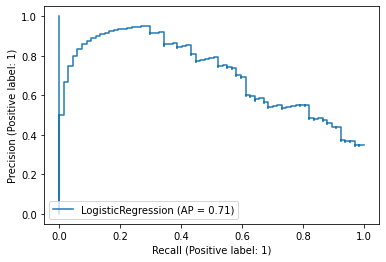

In [32]:
# precision_recall_curve
plot_precision_recall_curve(lr_clf, X_test, y_test)
plt.show()

In [33]:
# predict_proba : 레이블 값이 될 확률 추출
pred_probal = lr_clf.predict_proba(X_test)
pred_probal

array([[0.43075317, 0.56924683],
       [0.1514229 , 0.8485771 ],
       [0.83066801, 0.16933199],
       [0.89422599, 0.10577401],
       [0.80993608, 0.19006392],
       [0.86845156, 0.13154844],
       [0.95114867, 0.04885133],
       [0.8173569 , 0.1826431 ],
       [0.59260181, 0.40739819],
       [0.83807008, 0.16192992],
       [0.98800494, 0.01199506],
       [0.85851979, 0.14148021],
       [0.46346542, 0.53653458],
       [0.650544  , 0.349456  ],
       [0.86318849, 0.13681151],
       [0.15219306, 0.84780694],
       [0.4732038 , 0.5267962 ],
       [0.38147557, 0.61852443],
       [0.82973796, 0.17026204],
       [0.37218507, 0.62781493],
       [0.85341156, 0.14658844],
       [0.61713519, 0.38286481],
       [0.80102849, 0.19897151],
       [0.05949188, 0.94050812],
       [0.8170732 , 0.1829268 ],
       [0.7974215 , 0.2025785 ],
       [0.84505788, 0.15494212],
       [0.30048765, 0.69951235],
       [0.80684551, 0.19315449],
       [0.70798717, 0.29201283],
       [0.

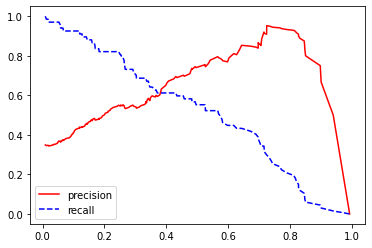

In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_probal[:, 1])
plt.plot(thresholds, precision[:thresholds.shape[0]], 'r-', label = 'precision')
plt.plot(thresholds, recall[:thresholds.shape[0]], 'b--', label='recall')
plt.legend()
plt.show()

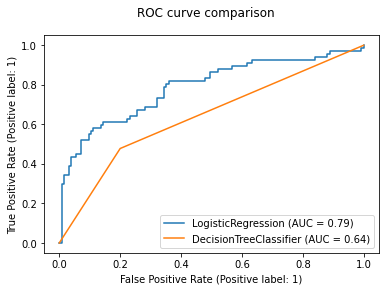

In [36]:
# 두 모델 ROC curve comparison
lr_clf_disp = plot_roc_curve(lr_clf, X_test, y_test)
dt_disp = plot_roc_curve(dt, X_test, y_test, ax=lr_clf_disp.ax_)
lr_clf_disp.figure_.suptitle("ROC curve comparison")
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature, target ,shuffle=True, stratify = target, random_state=156)

In [39]:
model_dic = {
    "Nearest Neighbors" : KNeighborsClassifier(3),
    "SVM" : SVC(),
    "Linear SVM" : SVC(kernel="linear", C=0.025),
    "RBF SVM" : SVC(gamma=2, C=1),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), 
    "LogisticRegression" : LogisticRegression(), 
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB(),
    "QDA" : QuadraticDiscriminantAnalysis()
}

In [40]:
model_p = {}
model_acc = {} 
model_auc = {} 

for key in model_dic.keys() :
  model = model_dic[key]
  print(f'{key} : training') 
  model.fit(X_train, y_train)
  
  print(f'{key} : predict') 
  model_p[key] = model.predict(X_test)
  model_acc[key] = accuracy_score(y_test, model_p[key])
  model_auc[key] = roc_auc_score(y_test, model_p[key])

Nearest Neighbors : training
Nearest Neighbors : predict
SVM : training
SVM : predict
Linear SVM : training
Linear SVM : predict
RBF SVM : training
RBF SVM : predict
Decision Tree : training
Decision Tree : predict
Random Forest : training
Random Forest : predict
LogisticRegression : training
LogisticRegression : predict
AdaBoost : training
AdaBoost : predict
Naive Bayes : training
Naive Bayes : predict
QDA : training
QDA : predict


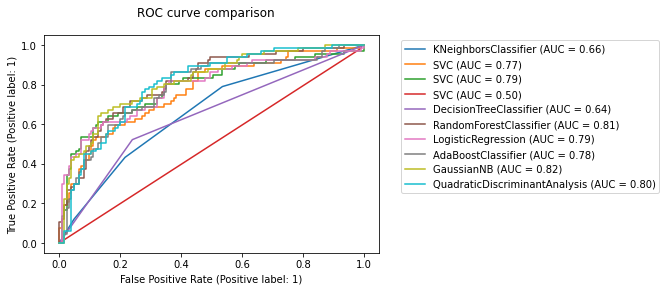

In [41]:
disp = plot_roc_curve(model_dic['Nearest Neighbors'], X_test, y_test) 
for key in model_dic.keys() :
  if key != 'Nearest Neighbors' :
    plot_roc_curve(model_dic[key], X_test, y_test, ax=disp.ax_)
  
disp.figure_.suptitle("ROC curve comparison")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [42]:
result = pd.DataFrame()
result['모델'] = model_acc.keys()
result['정확도'] = model_acc.values()
result['AUC'] = model_auc.values()
result.sort_values('정확도', ascending=False)

,모델,정확도,AUC
8,Naive Bayes,0.786458,0.752896
6,LogisticRegression,0.781250,0.728119
2,Linear SVM,0.770833,0.720119
5,Random Forest,0.750000,0.683343
7,AdaBoost,0.750000,0.711045
1,SVM,0.739583,0.671881
9,QDA,0.734375,0.705970
4,Decision Tree,0.677083,0.641194
0,Nearest Neighbors,0.661458,0.608418
3,RBF SVM,0.651042,0.500000
